In [51]:
import pandas as pd 
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [52]:
df=pd.read_csv('subscribers.csv')

In [53]:
df.drop(df.columns[ : 2], axis=1,inplace=True) 

In [54]:
# drop the customers that didn't finish their first trail

df=df[~(df['payment_period']==0)&(df['current_sub_TF']==False)]

In [55]:
df

,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,attribution_technical,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
10,NaN,NaN,NaN,expand regional access,34.551230,NaN,53.0,True,UAE,organic,...,0.0367,ar,Standard Charter,14,False,1,2019-07-25 16:00:42,NaN,2019-08-20 00:00:00,True
43,base,NaN,drama,access to exclusive content,25.851492,NaN,80.0,False,UAE,brand sem intent bing,...,0.0367,ar,NaN,14,False,1,2019-10-23 17:45:25,NaN,2019-11-21 00:00:00,True
65,enhanced,2.0,comedy,other,22.951579,2.0,56.0,False,UAE,facebook,...,0.0367,ar,NaN,14,False,1,2019-09-03 19:24:41,NaN,2019-10-18 00:00:00,True
104,NaN,3.0,NaN,education,30.201361,2.0,42.0,False,UAE,email_blast,...,0.0000,ar,Paypal,14,False,1,2019-07-26 18:13:43,NaN,2019-07-27 00:00:00,True
137,NaN,4.0,NaN,expand regional access,33.101274,2.0,56.0,False,UAE,organic,...,0.0367,ar,Paypal,14,False,2,2019-11-20 03:20:49,NaN,2020-02-25 00:00:00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227472,base,2.0,comedy,supplement OTT,18.601711,2.0,40.0,False,UAE,facebook,...,0.0367,ar,NaN,14,False,1,2019-08-25 22:45:11,NaN,2019-09-03 00:00:00,True
227498,base,2.0,international,access to exclusive content,27.301448,2.0,55.0,False,UAE,referral,...,0.0367,ar,Paypal,14,False,1,2019-10-20 03:19:46,NaN,NaN,True
227521,enhanced,3.0,drama,replace OTT,22.951579,2.0,32.0,False,UAE,search,...,0.0367,ar,NaN,14,False,1,2019-11-03 01:53:29,NaN,2020-01-12 00:00:00,True
227549,base,NaN,regional,access to exclusive content,27.301448,NaN,37.0,False,UAE,facebook,...,0.0367,ar,NaN,14,False,1,2019-10-17 22:08:53,NaN,2019-10-17 00:00:00,False


In [56]:
# Assume that the most recent account creation day is the day that the data was collected 
# if there is a cancel day，then the total active day of the customer is cancel day - account creation day
# if there is no cancel day， then we assume that the total active day is till the date that the data was collected
df['next_payment']=pd.to_datetime(df['next_payment']).dt.date
df['account_creation_date']=pd.to_datetime(df['account_creation_date']).dt.date
df['cancel_date']=df['cancel_date'].fillna(df['next_payment'])
df['cancel_date']=df['cancel_date'].fillna(df['last_payment'])
df['cancel_date']=pd.to_datetime(df['cancel_date']).dt.date


In [57]:
df['active_days']=df['cancel_date']-df['account_creation_date']
df['active_days']=df['active_days'].dt.days

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10837 entries, 10 to 227579
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   package_type                  6829 non-null   object        
 1   num_weekly_services_utilized  5779 non-null   float64       
 2   preferred_genre               6833 non-null   object        
 3   intended_use                  10634 non-null  object        
 4   weekly_consumption_hour       9269 non-null   float64       
 5   num_ideal_streaming_services  5661 non-null   float64       
 6   age                           9447 non-null   float64       
 7   male_TF                       10837 non-null  object        
 8   country                       10837 non-null  object        
 9   attribution_technical         10837 non-null  object        
 10  attribution_survey            10654 non-null  object        
 11  op_sys                    

In [59]:
df.drop(['country','plan_type','months_per_bill_period','language','trial_end_date','num_trial_days','trial_end_date','last_payment','attribution_technical','next_payment'], inplace = True, axis = 1)




In [60]:
df.drop(['cancel_date','account_creation_date'],axis=1,inplace=True)


In [61]:
# in the age columns, several number are more than 120, which seems inaccurate, delete these rows. 
df=df[(df['age']<100) & (df['age']>5) & (df['weekly_consumption_hour']>0) & (df['join_fee']>0)]

In [62]:
df

,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,attribution_survey,op_sys,monthly_price,discount_price,initial_credit_card_declined,join_fee,payment_type,current_sub_TF,payment_period,trial_completed,active_days
10,NaN,NaN,NaN,expand regional access,34.551230,NaN,53.0,True,public_radio,NaN,4.7343,4.5141,False,0.0367,Standard Charter,False,1,True,40
43,base,NaN,drama,access to exclusive content,25.851492,NaN,80.0,False,facebook,Android,4.7343,4.5141,False,0.0367,NaN,False,1,True,43
65,enhanced,2.0,comedy,other,22.951579,2.0,56.0,False,facebook,iOS,4.7343,4.5141,False,0.0367,NaN,False,1,True,59
137,NaN,4.0,NaN,expand regional access,33.101274,2.0,56.0,False,facebook,iOS,4.7343,4.5141,False,0.0367,Paypal,False,2,True,234
170,NaN,3.0,NaN,expand regional access,27.301448,2.0,26.0,False,facebook,iOS,4.7343,4.5141,False,0.0367,Standard Charter,False,1,True,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227450,base,3.0,comedy,supplement OTT,30.201361,2.0,48.0,False,facebook,iOS,4.7343,4.5141,False,0.0367,NaN,False,1,True,131
227472,base,2.0,comedy,supplement OTT,18.601711,2.0,40.0,False,facebook,iOS,4.7343,4.5141,False,0.0367,NaN,False,1,True,23
227498,base,2.0,international,access to exclusive content,27.301448,2.0,55.0,False,public_radio,Android,4.7343,4.5141,False,0.0367,Paypal,False,1,True,14
227521,enhanced,3.0,drama,replace OTT,22.951579,2.0,32.0,False,facebook,iOS,4.7343,4.5141,False,0.0367,NaN,False,1,True,84


In [63]:
# to create dummy variables, first fill nan value with unknow
df[['package_type','preferred_genre','op_sys','initial_credit_card_declined','intended_use','male_TF','attribution_survey','payment_type','current_sub_TF','trial_completed']]=df[['package_type','preferred_genre','op_sys','initial_credit_card_declined','intended_use','male_TF','attribution_survey','payment_type','current_sub_TF','trial_completed']].fillna('Unknow')

/Users/natalie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [64]:
# then fill missing value with their average number
df=df.fillna(df.mean())

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7418 entries, 10 to 227549
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   package_type                  7418 non-null   object 
 1   num_weekly_services_utilized  7418 non-null   float64
 2   preferred_genre               7418 non-null   object 
 3   intended_use                  7418 non-null   object 
 4   weekly_consumption_hour       7418 non-null   float64
 5   num_ideal_streaming_services  7418 non-null   float64
 6   age                           7418 non-null   float64
 7   male_TF                       7418 non-null   bool   
 8   attribution_survey            7418 non-null   object 
 9   op_sys                        7418 non-null   object 
 10  monthly_price                 7418 non-null   float64
 11  discount_price                7418 non-null   float64
 12  initial_credit_card_declined  7418 non-null   bool   
 13  

In [66]:
df1=df

In [67]:
df=pd.get_dummies(df, columns=['package_type','preferred_genre','op_sys','initial_credit_card_declined','intended_use','male_TF','attribution_survey','payment_type','current_sub_TF','trial_completed'], sparse=False, drop_first=True, dtype=int)



In [68]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal as mvn

ms = MinMaxScaler()
X = ms.fit_transform(df)  

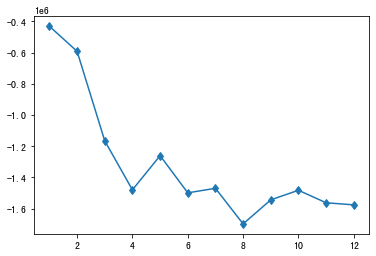

In [75]:
bic = []

for i in range(12):
    gm = GaussianMixture(
                     n_components = i+1,
                     covariance_type='full')
    
    gm.fit(X)
    bic.append(gm.bic(X))


fig = plt.figure()

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12], bic, marker = "d", label = 'bic')
plt.show()

In [76]:

gmm = GaussianMixture(n_components=4, covariance_type='full',
                      tol=0.001, reg_covar=1e-06, max_iter=100,
                      n_init=1, init_params='kmeans', weights_init=None, 
                      means_init=None, precisions_init=None, random_state=None, 
                      warm_start=False, verbose=0, verbose_interval=10).fit(X)



In [77]:
labels=gmm.fit_predict(X, y=None)

df['lables']= labels

In [78]:
df1['lables']= labels

In [79]:
df1.to_csv('Marketing_Analysis3.csv')

In [80]:
df1

,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,attribution_survey,op_sys,monthly_price,discount_price,initial_credit_card_declined,join_fee,payment_type,current_sub_TF,payment_period,trial_completed,active_days,lables
10,Unknow,3.009162,Unknow,expand regional access,34.551230,2.051506,53.0,True,public_radio,Unknow,4.7343,4.5141,False,0.0367,Standard Charter,False,1,True,40,3
43,base,3.009162,drama,access to exclusive content,25.851492,2.051506,80.0,False,facebook,Android,4.7343,4.5141,False,0.0367,Unknow,False,1,True,43,0
65,enhanced,2.000000,comedy,other,22.951579,2.000000,56.0,False,facebook,iOS,4.7343,4.5141,False,0.0367,Unknow,False,1,True,59,2
137,Unknow,4.000000,Unknow,expand regional access,33.101274,2.000000,56.0,False,facebook,iOS,4.7343,4.5141,False,0.0367,Paypal,False,2,True,234,3
170,Unknow,3.000000,Unknow,expand regional access,27.301448,2.000000,26.0,False,facebook,iOS,4.7343,4.5141,False,0.0367,Standard Charter,False,1,True,131,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227450,base,3.000000,comedy,supplement OTT,30.201361,2.000000,48.0,False,facebook,iOS,4.7343,4.5141,False,0.0367,Unknow,False,1,True,131,2
227472,base,2.000000,comedy,supplement OTT,18.601711,2.000000,40.0,False,facebook,iOS,4.7343,4.5141,False,0.0367,Unknow,False,1,True,23,2
227498,base,2.000000,international,access to exclusive content,27.301448,2.000000,55.0,False,public_radio,Android,4.7343,4.5141,False,0.0367,Paypal,False,1,True,14,0
227521,enhanced,3.000000,drama,replace OTT,22.951579,2.000000,32.0,False,facebook,iOS,4.7343,4.5141,False,0.0367,Unknow,False,1,True,84,0
